In [27]:
import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt

Number of frames: 1610


/var/folders/t0/9s1kd78j2w76jjypvc2j3x900000gn/T/ipykernel_34137/3132091180.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


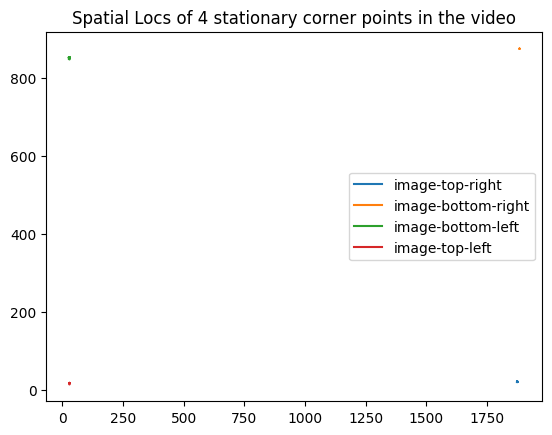

'\nBasically the image axes in pixels are:\norigin is at the top left corner\nincreases towards the right and bottom\n'

In [28]:
# Corner Data
filename = "/Users/pranathipoojary/Downloads/12_38_1_digitisation/12_38_1_corner_data_xypts.csv"
df = pd.read_csv(filename)
df.fillna(method='ffill', inplace=True)
print("Number of frames:", len(df))


plt.plot(df['pt1_cam1_X'], df['pt1_cam1_Y'])
plt.plot(df['pt2_cam1_X'], df['pt2_cam1_Y'])
plt.plot(df['pt3_cam1_X'], df['pt3_cam1_Y'])
plt.plot(df['pt4_cam1_X'], df['pt4_cam1_Y'])
plt.legend(['image-top-right', 'image-bottom-right', 'image-bottom-left', 'image-top-left'])
plt.title('Spatial Locs of 4 stationary corner points in the video')
plt.show()


'''
Basically the image axes in pixels are:
origin is at the top left corner
increases towards the right and bottom
'''

Number of frames: 1610


/var/folders/t0/9s1kd78j2w76jjypvc2j3x900000gn/T/ipykernel_34137/1536516954.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


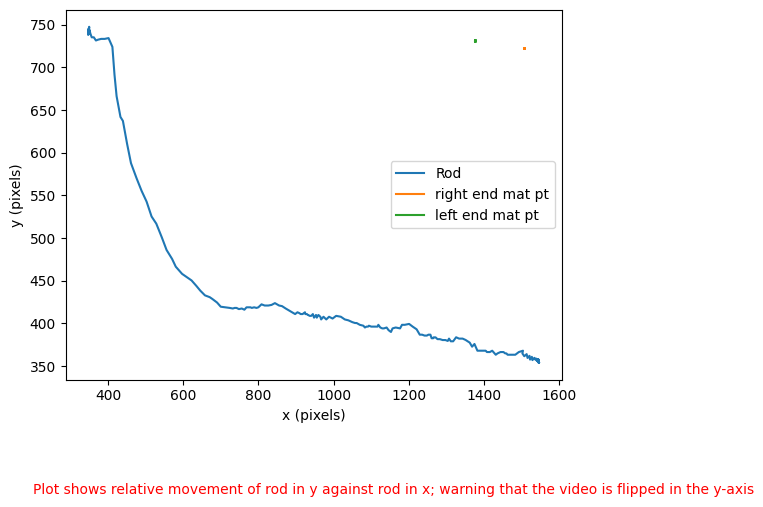

In [29]:
filename = "12_38_1_digitisation/12_38_1_rod_mat2_data_xypts.csv"
df = pd.read_csv(filename)
df.fillna(method='ffill', inplace=True)
print("Number of frames:", len(df))

for i, col in enumerate(df.columns):
    if i%2==0:
        x = col
        y = col[:-1]+"Y"
        plt.plot(df[x], df[y])

plt.legend(['Rod', 'right end mat pt', 'left end mat pt'])
plt.xlabel('x (pixels)')
plt.ylabel('y (pixels)')
plt.text(200, 200, "Plot shows relative movement of rod in y against rod in x; warning that the video is flipped in the y-axis", fontsize=10, color='red')
plt.show()

There are 1155 nans in pt1_cam1_X
There are 1155 nans in pt1_cam1_Y
There are 1546 nans in pt2_cam1_X
There are 1546 nans in pt2_cam1_Y
There are 1545 nans in pt3_cam1_X
There are 1545 nans in pt3_cam1_Y
Number of frames: 1610
1610


/var/folders/t0/9s1kd78j2w76jjypvc2j3x900000gn/T/ipykernel_34137/2957001597.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


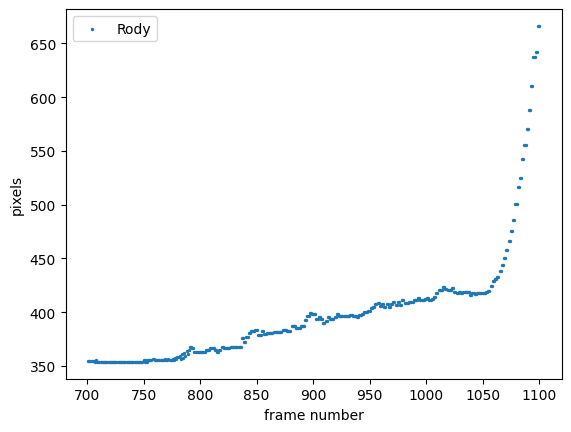

In [30]:
filename = "12_38_1_digitisation/12_38_1_rod_mat2_data_xypts.csv"
df = pd.read_csv(filename)
for col in df.columns:
    print(f'There are {df[col].isna().sum()} nans in {col}')

df.fillna(method='ffill', inplace=True)
print("Number of frames:", len(df))

frames = range(1, len(df)+1)
print(len(frames))
plt.scatter(frames[700: 1100], df['pt1_cam1_Y'][700: 1100], s=2)
# plt.scatter(frames, df['pt1_cam1_X'], s=2)
# plt.plot(frames, df['pt1_cam1_Y'])
# plt.plot(frames, df['pt1_cam1_X'])

plt.legend(['Rody', 'Rodx'])
plt.xlabel('frame number')
plt.ylabel('pixels')
plt.show()

In [31]:
# Obtaining pixel length of mat
right_end_X = df['pt2_cam1_X'].mean().item()
right_end_Y = df['pt2_cam1_Y'].mean().item()
left_end_X = df['pt3_cam1_X'].mean().item()
left_end_Y = df['pt3_cam1_Y'].mean().item()

len_of_mat = math.sqrt(((right_end_X-left_end_X)**2) + ((right_end_Y-left_end_Y)**2))

print("Right end of the mat coords:", round(right_end_X, 2), round(right_end_Y, 2))
print("Left end of the mat coords:", round(left_end_X, 2), round(left_end_Y, 2))
print("Length of mat in pixels:", round(len_of_mat, 2), "pixels")

Right end of the mat coords: 1506.66 722.01
Left end of the mat coords: 1376.36 730.33
Length of mat in pixels: 130.56 pixels


One pixel in mm: 0.31 mm


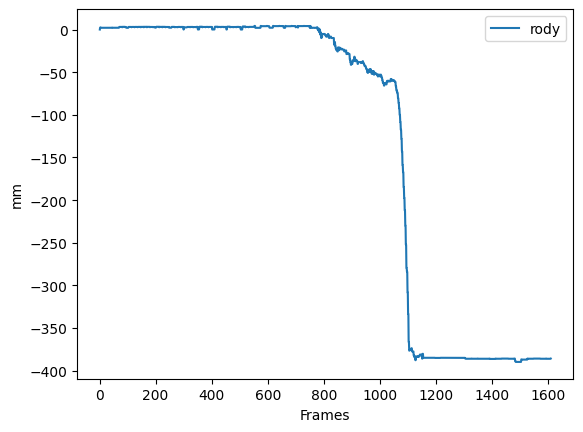

In [32]:
# Conversion from pixel to real cm
# Based on the mat being 40mm
# Reference point is the rod in frame 1/1610; this will be 0, 0 (i.e., initial y point is 0)

len_of_mat_mm = 40

one_pix_in_mm = len_of_mat_mm/len_of_mat
print("One pixel in mm:", round(one_pix_in_mm, 2), "mm")

df_mm = df.copy(deep=True)
df_mm['pt1_cam1_X'] = df_mm['pt1_cam1_X'].iloc[0] -  df_mm['pt1_cam1_X']
df_mm['pt1_cam1_Y'] = df_mm['pt1_cam1_Y'].iloc[0] - df_mm['pt1_cam1_Y']

frames = range(1, len(df)+1)

plt.plot(frames, df_mm['pt1_cam1_Y'])
# plt.plot(frames, df_mm['pt1_cam1_X'])

plt.xlabel('Frames')
plt.ylabel('mm')
plt.legend(['rody', 'rodx'])
plt.show()

In [33]:
def marta_matlab_code():
    pass
    # clear all
    # close all
    # clc

    # load_system('PDW_Simulation')

    # %% Initialise fixed parameters

    # max_run_time = 5;
    # maximum_step_size = 0.001;
    # relative_tolerance = 1e-3;
    # PDW_Simulation_DataFile4
    # set_param(bdroot,'Solver','ode23')
    # mass = 0.029;


    # %% Initialise variable parameters

    # ramp_angle = 4;
    # initial_inter_leg_angle = 38;
    # initial_stance_angle = 12;

    # set_model_parameters(ramp_angle, initial_inter_leg_angle, initial_stance_angle)
    # threshold = 0.1*initial_inter_leg_angle*pi/180;


    # %% Run Experiment
    # % Set simulation parameters
    # set_model_parameters(ramp_angle, initial_inter_leg_angle, initial_stance_angle);
        
    # % Start the simulation
    # set_param('PDW_Simulation', 'SimulationCommand', 'start');

    # % % Monitor the simulation
    # while strcmp(get_param('PDW_Simulation', 'SimulationStatus'), 'running')
    #     pause(0.1);
    # end

    # %% Obtain CoM output

    # CoM_height = out.CoM.Data(:,3);
    # CoM_length =  out.CoM.Data(:,1);
    # time = out.CoM.Time;

    # g = 9.80665;
    # %% PE (detrended)
    # PE = mass * g * (CoM_height + tan(ramp_angle*pi/180) .* CoM_length);


    # %% KE

    # % Obtain the velocity in the x and z direction
    # CoM_vx = gradient((CoM_length),time);
    # CoM_vz = gradient((CoM_height),time);

    # % Moving average on the CoM velocity to smoothen
    # window_size = 2000;
    # CoM_vx_smoothed = movmean(CoM_vx, window_size);
    # CoM_vz_smoothed = movmean(CoM_vz, window_size);

    # % Obtain the magnitude of the vectors and calculate KE
    # CoM_v = sqrt(CoM_vx_smoothed.^2 + CoM_vz_smoothed.^2);
    # CoM_KE = 1/2*mass*(CoM_v).^2;
    # %% Actual plot

    # figure;
    # hold on;
    # plot(time, CoM_KE, 'LineWidth', 1.5, 'Color', 'b'); 
    # hold on;
    # %plot the vertical lines (hard-coded :/)
    # ylim([-0.003 0.006])
    # plot(time, PE, 'LineWidth', 1.5, 'Color','r');
    # hold on;
    # plot([0.078 0.078],ylim,'Color', [0 0 0 0.6], 'LineStyle', '--', 'LineWidth', 1);
    # hold on;
    # plot([0.407 0.407],ylim,'Color', [0 0 0 0.6], 'LineStyle', '--', 'LineWidth', 1);
    # hold on;
    # plot([0.602 0.602],ylim,'Color', [0 0 0 0.6], 'LineStyle', '--', 'LineWidth', 1);
    # hold on;
    # plot([0.768 0.768],ylim,'Color', [0 0 0 0.6], 'LineStyle', '--', 'LineWidth', 1);
    # hold on;
    # plot([0.913 0.913],ylim,'Color', [0 0 0 0.6], 'LineStyle', '--', 'LineWidth', 1);
    # hold on;

    # xlabel('Time (s)', 'FontSize',20);
    # ylabel('Energy (J)', 'FontSize',20);
    # title('Kinetic Energy and Detrended Potential Energy against Time', 'FontSize',20); 
    # xlim([0 3])
    # legend('KE', 'PE', 'FontSize', 40);

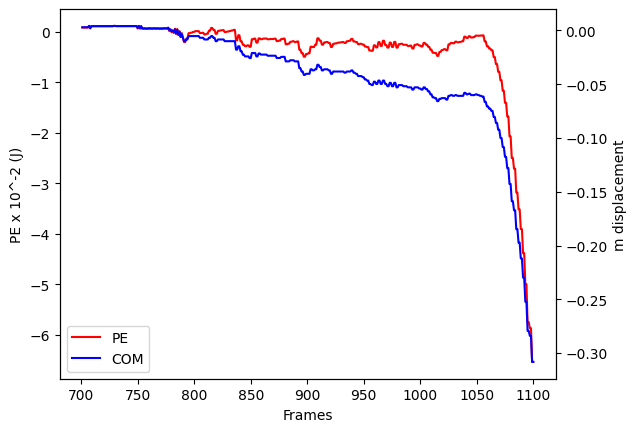

In [34]:
rod_y = df_mm['pt1_cam1_Y']*(10**-3)
rod_x = df_mm['pt1_cam1_X']*(10**-3)
ramp_angle = 4
time_frames = range(1, len(df_mm)+1)
g = 9.80665

mass = 0.029
potential_E = mass * g * (rod_y + math.tan(4*math.pi/180) * rod_x) * 10**2

fig, ax1 = plt.subplots()
line1, = ax1.plot(time_frames[700: 1100], potential_E[700: 1100], 'r', label='PE')
ax1.set_xlabel('Frames')
ax1.set_ylabel('PE x 10^-2 (J)')
ax1.legend(["PE"])

ax2 = ax1.twinx()
line2, = ax2.plot(time_frames[700: 1100], rod_y[700:1100], 'b', label='COM')
ax2.set_ylabel('m displacement')

labels = [line.get_label() for line in [line1, line2]]
ax1.legend([line1, line2], labels)
# ax2.legend(["comy"])

# plt.figure()
# plt.plot(time_frames[700: 1100], rod_y[700:1100])
# plt.legend(["com y"])
# plt.xlabel('Frames')
# plt.ylabel('Rod y(m)')

plt.show()